In [1]:
import pandas as pd
import numpy as np

In [2]:
train_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_train_2_group.csv')

In [3]:
a=train_1[train_1['target']==1]

In [4]:
b=train_1[train_1['target']==0]

In [5]:
lis = [(a['day_sum_rain']<=80), (a['day_sum_rain']>80)]
choicelist = [0,1]
a['ch']=np.select(lis, choicelist)
lis_2 = [(b['day_sum_rain']<=200), (b['day_sum_rain']>200)]
choicelist = [1,0]
b['ch']=np.select(lis_2, choicelist)

<ipython-input-5-a38f626a5b9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ch']=np.select(lis, choicelist)
<ipython-input-5-a38f626a5b9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['ch']=np.select(lis_2, choicelist)


In [6]:
train_11=a[a['ch']==1]
train_12=b[b['ch']==1]

In [7]:
train_1=pd.concat([train_11, train_12])

In [8]:
train_1=train_1.drop(['ch'], axis=1)

In [9]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str)  

In [10]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target', 'variable'], axis=1)

In [11]:
train_1_array=np.array(train_1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 64]=le.fit_transform(train_1_array[:,64])

In [13]:
train_1_array[:, 6]=le.fit_transform(train_1_array[:,6])

In [14]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [15]:
train_1=train_1.astype(float)

In [16]:
test_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_test_2_group.csv')

In [17]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str) 

In [18]:
test_1=test_1.sort_values(by=['index'])

In [19]:
test_id_1=test_1[['index', 'date', 'umd']]

In [20]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)
test_1_array=np.array(test_1)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 64]=le.fit_transform(test_1_array[:,64])

In [22]:
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [23]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [24]:
test_1=test_1.astype(float)

In [25]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [26]:
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [27]:
# shuffle1
import sklearn
x_shuffled1 = sklearn.utils.shuffle(X_features, random_state=2021)
y_shuffled1 =sklearn.utils.shuffle(y_label, random_state=2021)
X_train1, X_test1, y_train1, y_test1=train_test_split(x_shuffled1, y_shuffled1, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train1.shape, X_test1.shape)

(4117, 87) (1765, 87)


In [28]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train1, y_train1)

In [29]:
# shuffle2
import sklearn
x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=2022)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=2022)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2022, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(4117, 87) (1765, 87)


In [30]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [31]:
# shuffle3
import sklearn
x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=2023)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=2023)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2023, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(4117, 87) (1765, 87)


In [32]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3 = smote_nc.fit_resample(X_train3, y_train3)

In [33]:
# shuffle4
import sklearn
x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=2024)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=2024)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2024, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(4117, 87) (1765, 87)


In [34]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4 = smote_nc.fit_resample(X_train4, y_train4)

In [35]:
# shuffle5
import sklearn
x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=2025)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=2025)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2025, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(4117, 87) (1765, 87)


In [36]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5 = smote_nc.fit_resample(X_train5, y_train5)

In [37]:
# shuffle6
import sklearn
x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=2026)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=2026)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2026, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(4117, 87) (1765, 87)


In [38]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6 = smote_nc.fit_resample(X_train6, y_train6)

In [39]:
# shuffle7
import sklearn
x_shuffled7 = sklearn.utils.shuffle(X_features, random_state=2027)
y_shuffled7 =sklearn.utils.shuffle(y_label, random_state=2027)
X_train7, X_test7, y_train7, y_test7=train_test_split(x_shuffled7, y_shuffled7, test_size=0.3, random_state=2027, stratify=y_label)
print(X_train7.shape, X_test7.shape)

(4117, 87) (1765, 87)


In [40]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled7, y_resampled7 = smote_nc.fit_resample(X_train7, y_train7)

In [41]:
# shuffle8
import sklearn
x_shuffled8 = sklearn.utils.shuffle(X_features, random_state=2028)
y_shuffled8 =sklearn.utils.shuffle(y_label, random_state=2028)
X_train8, X_test8, y_train8, y_test8=train_test_split(x_shuffled8, y_shuffled8, test_size=0.3, random_state=2028, stratify=y_label)
print(X_train8.shape, X_test8.shape)

(4117, 87) (1765, 87)


In [42]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled8, y_resampled8 = smote_nc.fit_resample(X_train8, y_train8)

In [43]:
# shuffle9
import sklearn
x_shuffled9 = sklearn.utils.shuffle(X_features, random_state=2029)
y_shuffled9 =sklearn.utils.shuffle(y_label, random_state=2029)
X_train9, X_test9, y_train9, y_test9=train_test_split(x_shuffled9, y_shuffled9, test_size=0.3, random_state=2029, stratify=y_label)
print(X_train9.shape, X_test9.shape)

(4117, 87) (1765, 87)


In [44]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled9, y_resampled9 = smote_nc.fit_resample(X_train9, y_train9)

In [45]:
# shuffle10
import sklearn
x_shuffled10 = sklearn.utils.shuffle(X_features, random_state=2030)
y_shuffled10 =sklearn.utils.shuffle(y_label, random_state=2030)
X_train10, X_test10, y_train10, y_test10=train_test_split(x_shuffled10, y_shuffled10, test_size=0.3, random_state=2030, stratify=y_label)
print(X_train10.shape, X_test10.shape)

(4117, 87) (1765, 87)


In [46]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled10, y_resampled10 = smote_nc.fit_resample(X_train10, y_train10)

In [47]:
from bayes_opt import BayesianOptimization

In [48]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test1, y_test1)]
    model.fit(X_resampled1, y_resampled1, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.08193  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07805  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.08015  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.07406  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.08352  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.07284  |  0.5      |  0.01     |  10.0     |  9.0      |  33.26    |  0.9301   |
|  7        | -0.0726   |  0.5      |  0.01     |  10.0     |  9.0      |  40.4     |  0.8      |
|  8        | -0.07864  |  1.0      |  0.3      |  10.0     |  5.0      |  45.0     |  0.8      |
|  9        | -0.079

[1]	valid_0's binary_logloss: 0.177077
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.163675
[3]	valid_0's binary_logloss: 0.152197
[4]	valid_0's binary_logloss: 0.140436
[5]	valid_0's binary_logloss: 0.134553
[6]	valid_0's binary_logloss: 0.125853
[7]	valid_0's binary_logloss: 0.119569
[8]	valid_0's binary_logloss: 0.114081
[9]	valid_0's binary_logloss: 0.110083
[10]	valid_0's binary_logloss: 0.105088
[11]	valid_0's binary_logloss: 0.10104
[12]	valid_0's binary_logloss: 0.0975226
[13]	valid_0's binary_logloss: 0.0955963
[14]	valid_0's binary_logloss: 0.0925338
[15]	valid_0's binary_logloss: 0.089742
[16]	valid_0's binary_logloss: 0.0881873
[17]	valid_0's binary_logloss: 0.0863836
[18]	valid_0's binary_logloss: 0.0843662
[19]	valid_0's binary_logloss: 0.0824272
[20]	valid_0's binary_logloss: 0.081573
[21]	valid_0's binary_logloss: 0.0794803
[22]	valid_0's binary_logloss: 0.0776945
[23]	valid_0's binary_logloss: 0.0763671
[24]	valid_0's bin

[227]	valid_0's binary_logloss: 0.0616733
[228]	valid_0's binary_logloss: 0.0616674
[229]	valid_0's binary_logloss: 0.0617128
[230]	valid_0's binary_logloss: 0.0617163
[231]	valid_0's binary_logloss: 0.0617281
[232]	valid_0's binary_logloss: 0.0616727
[233]	valid_0's binary_logloss: 0.0617443
[234]	valid_0's binary_logloss: 0.0616929
[235]	valid_0's binary_logloss: 0.0617083
[236]	valid_0's binary_logloss: 0.0616919
[237]	valid_0's binary_logloss: 0.0617668
[238]	valid_0's binary_logloss: 0.06175
[239]	valid_0's binary_logloss: 0.0618602
[240]	valid_0's binary_logloss: 0.0618428
[241]	valid_0's binary_logloss: 0.0618137
Early stopping, best iteration is:
[141]	valid_0's binary_logloss: 0.0604749


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

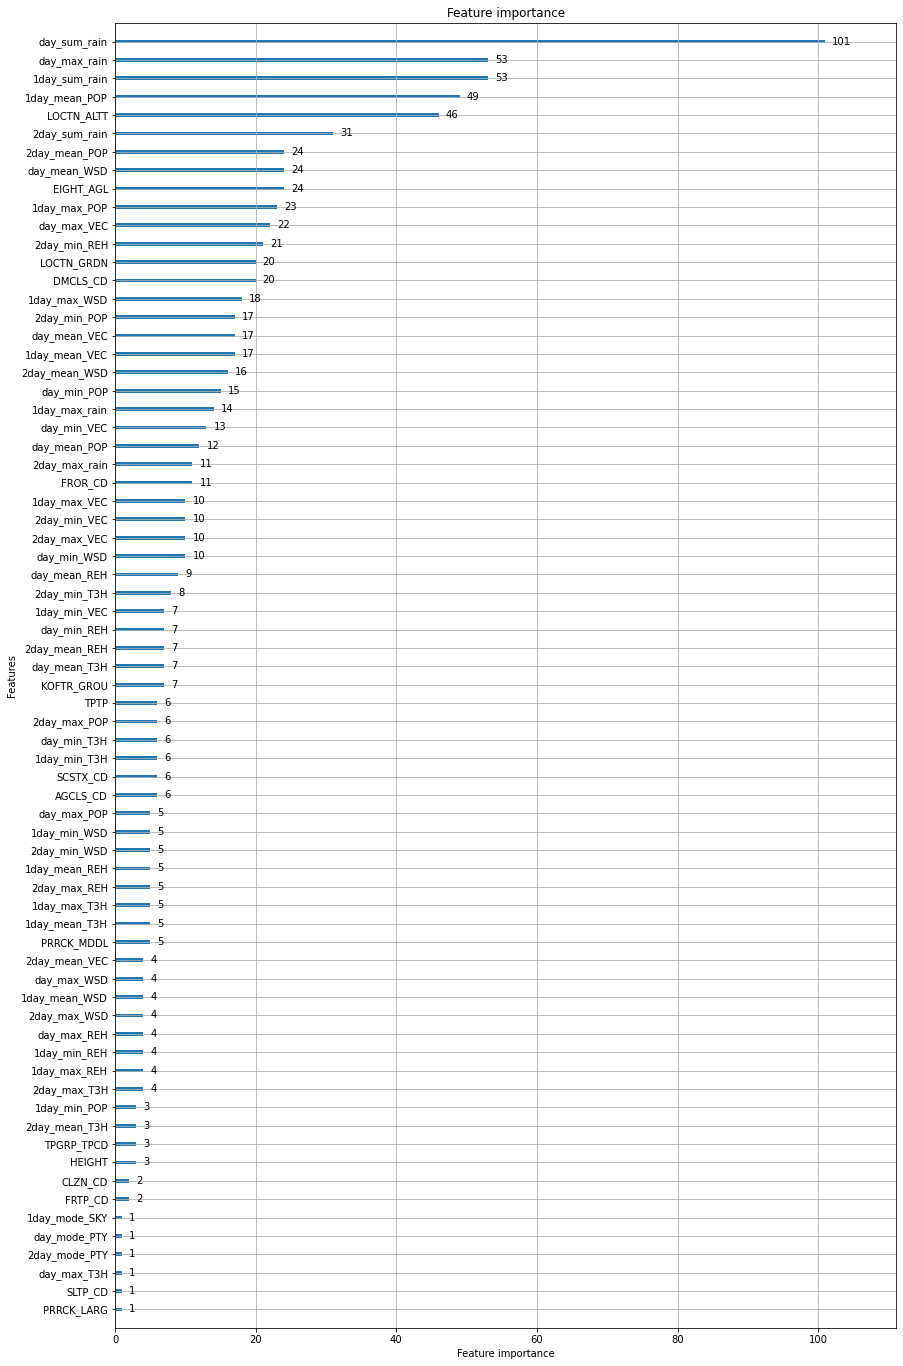

In [49]:
# LIGHTGBM  학습
                       
lgbm1 = LGBMClassifier(n_estimators=300, learning_rate=0.06745, num_leaves=31, sumbsample=0.9385 , colsample_bytree=0.5702, max_depth=9,
                             min_child_weight=8.873)
evals = [(X_test1, y_test1)]
lgbm1.fit(X_train1, y_train1, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm1, ax=ax)

In [50]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test2, y_test2)]
    model.fit(X_resampled2, y_resampled2, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.06021  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.06008  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.06108  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.05967  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.06015  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.05826  |  0.5065   |  0.05462  |  8.321    |  7.455    |  31.8     |  0.9542   |
|  7        | -0.05851  |  0.5342   |  0.01114  |  9.103    |  6.496    |  32.09    |  0.9841   |
|  8        | -0.05845  |  0.5      |  0.04425  |  9.036    |  8.019    |  33.53    |  0.8912   |
|  9        | -0.063

[1]	valid_0's binary_logloss: 0.168172
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.141989
[3]	valid_0's binary_logloss: 0.124974
[4]	valid_0's binary_logloss: 0.114134
[5]	valid_0's binary_logloss: 0.108299
[6]	valid_0's binary_logloss: 0.101697
[7]	valid_0's binary_logloss: 0.0961886
[8]	valid_0's binary_logloss: 0.0914235
[9]	valid_0's binary_logloss: 0.0886604
[10]	valid_0's binary_logloss: 0.0849711
[11]	valid_0's binary_logloss: 0.0816515
[12]	valid_0's binary_logloss: 0.0790415
[13]	valid_0's binary_logloss: 0.0774345
[14]	valid_0's binary_logloss: 0.0751142
[15]	valid_0's binary_logloss: 0.0729826
[16]	valid_0's binary_logloss: 0.0718201
[17]	valid_0's binary_logloss: 0.0703176
[18]	valid_0's binary_logloss: 0.0686271
[19]	valid_0's binary_logloss: 0.0676934
[20]	valid_0's binary_logloss: 0.0665645
[21]	valid_0's binary_logloss: 0.0656639
[22]	valid_0's binary_logloss: 0.0649758
[23]	valid_0's binary_logloss: 0.0640917
[24]	valid

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

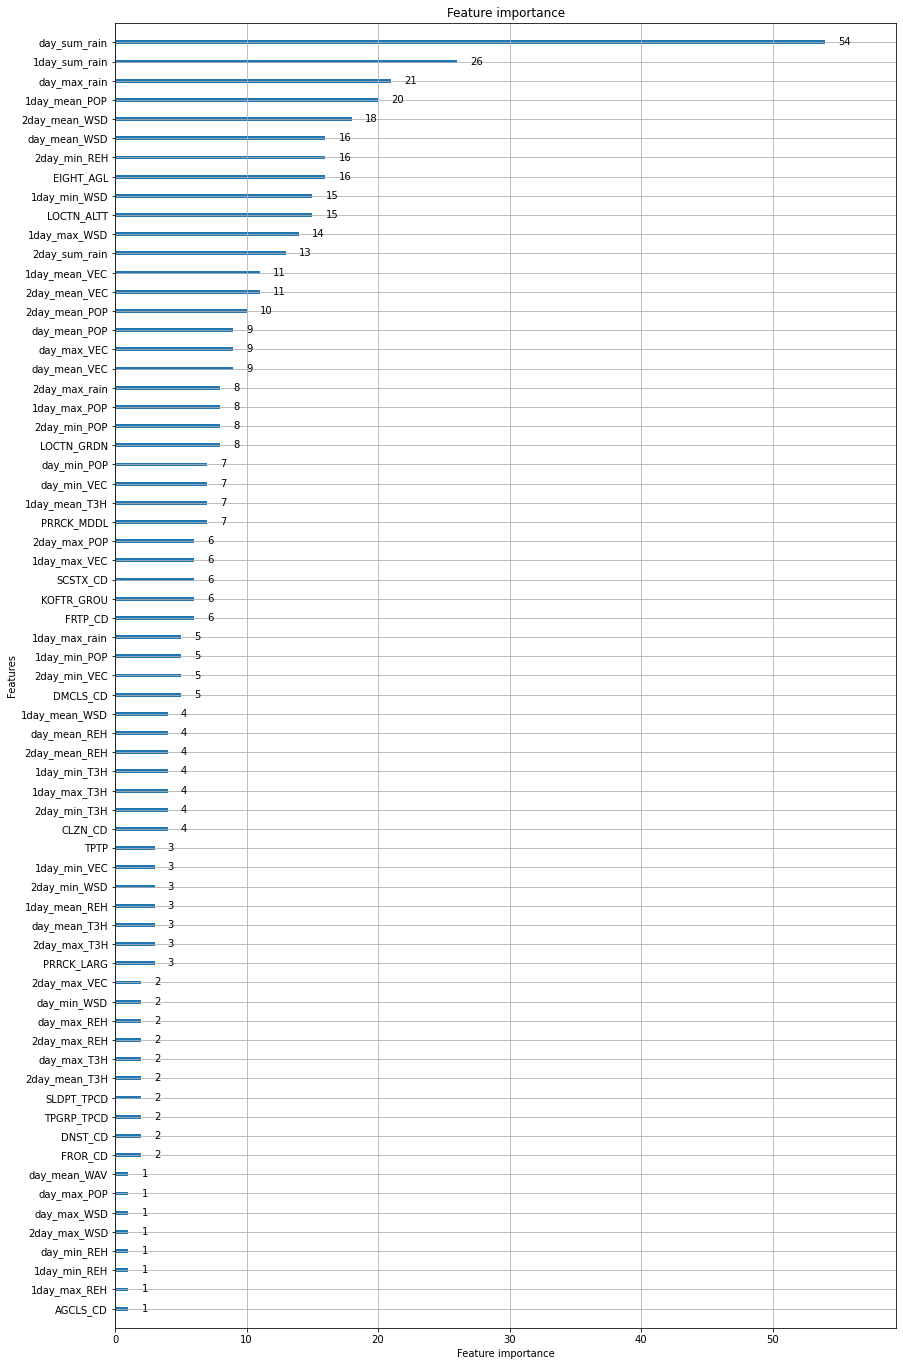

In [51]:
# LIGHTGBM  학습
                       
lgbm2 = LGBMClassifier(n_estimators=300, learning_rate=0.1102, num_leaves=33, sumbsample=0.937, colsample_bytree=0.5931, max_depth=6,
                             min_child_weight=7.155)
evals = [(X_test2, y_test2)]
lgbm2.fit(X_train2, y_train2, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm2, ax=ax)

In [52]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test3, y_test3)]
    model.fit(X_resampled3, y_resampled3, eval_metric="", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.08466  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.07822  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.07944  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.07121  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.0808   |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06913  |  0.5487   |  0.05569  |  9.985    |  8.401    |  31.45    |  0.9455   |
|  7        | -0.07097  |  1.0      |  0.01     |  10.0     |  5.572    |  29.55    |  1.0      |
|  8        | -0.07239  |  1.0      |  0.01     |  10.0     |  9.0      |  36.9     |  1.0      |
|  9        | -0.071

[1]	valid_0's binary_logloss: 0.185815
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.183121
[3]	valid_0's binary_logloss: 0.181275
[4]	valid_0's binary_logloss: 0.177758
[5]	valid_0's binary_logloss: 0.175785
[6]	valid_0's binary_logloss: 0.172412
[7]	valid_0's binary_logloss: 0.169133
[8]	valid_0's binary_logloss: 0.166214
[9]	valid_0's binary_logloss: 0.164962
[10]	valid_0's binary_logloss: 0.162194
[11]	valid_0's binary_logloss: 0.159679
[12]	valid_0's binary_logloss: 0.157361
[13]	valid_0's binary_logloss: 0.156213
[14]	valid_0's binary_logloss: 0.15421
[15]	valid_0's binary_logloss: 0.152915
[16]	valid_0's binary_logloss: 0.15156
[17]	valid_0's binary_logloss: 0.149845
[18]	valid_0's binary_logloss: 0.148279
[19]	valid_0's binary_logloss: 0.146564
[20]	valid_0's binary_logloss: 0.145326
[21]	valid_0's binary_logloss: 0.143705
[22]	valid_0's binary_logloss: 0.142253
[23]	valid_0's binary_logloss: 0.141073
[24]	valid_0's binary_logloss

[209]	valid_0's binary_logloss: 0.0708087
[210]	valid_0's binary_logloss: 0.0706458
[211]	valid_0's binary_logloss: 0.0704864
[212]	valid_0's binary_logloss: 0.0703808
[213]	valid_0's binary_logloss: 0.0702767
[214]	valid_0's binary_logloss: 0.0701823
[215]	valid_0's binary_logloss: 0.0700257
[216]	valid_0's binary_logloss: 0.0699095
[217]	valid_0's binary_logloss: 0.0698154
[218]	valid_0's binary_logloss: 0.0697088
[219]	valid_0's binary_logloss: 0.0695616
[220]	valid_0's binary_logloss: 0.0694419
[221]	valid_0's binary_logloss: 0.069321
[222]	valid_0's binary_logloss: 0.0692051
[223]	valid_0's binary_logloss: 0.0691004
[224]	valid_0's binary_logloss: 0.069043
[225]	valid_0's binary_logloss: 0.0689848
[226]	valid_0's binary_logloss: 0.0688987
[227]	valid_0's binary_logloss: 0.0687902
[228]	valid_0's binary_logloss: 0.0686802
[229]	valid_0's binary_logloss: 0.0685906
[230]	valid_0's binary_logloss: 0.0684677
[231]	valid_0's binary_logloss: 0.0684065
[232]	valid_0's binary_logloss: 0.06

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

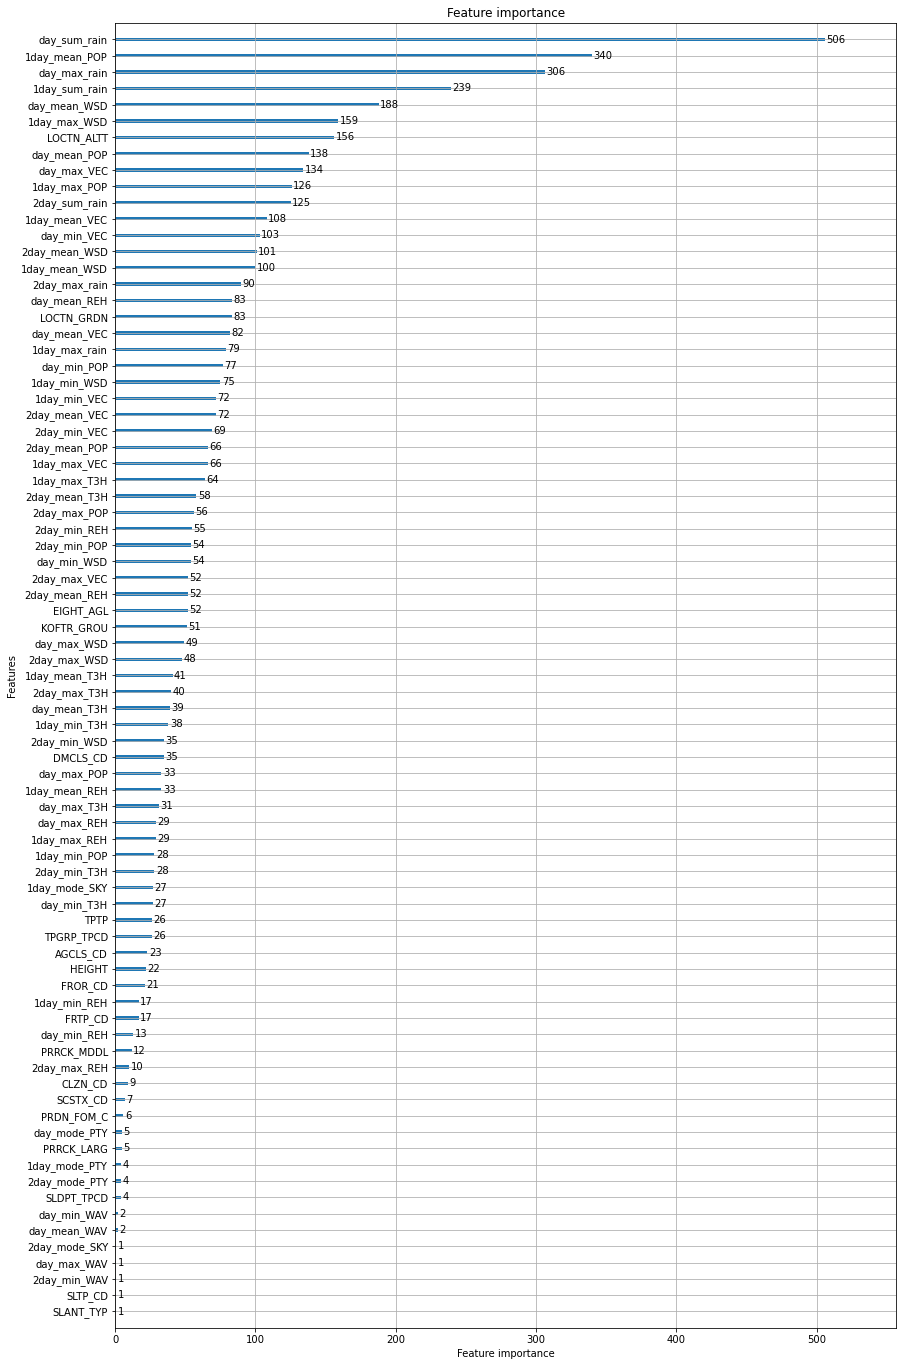

In [53]:
# LIGHTGBM  학습
                       
lgbm3 = LGBMClassifier(n_estimators=300, learning_rate=0.01, num_leaves=44, sumbsample=0.8117, colsample_bytree=0.5, max_depth=10,
                             min_child_weight=5)
evals = [(X_test3, y_test3)]
lgbm3.fit(X_train3, y_train3, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm3, ax=ax)

In [54]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test4, y_test4)]
    model.fit(X_resampled4, y_resampled4, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.06237  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.06025  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.06657  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.06214  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.06225  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06392  |  0.9492   |  0.1753   |  6.317    |  6.892    |  32.97    |  0.8506   |
|  7        | -0.05783  |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        | -0.06241  |  0.8546   |  0.1477   |  7.56     |  6.998    |  27.76    |  0.8888   |
|  9        | -0.059

[1]	valid_0's binary_logloss: 0.146498
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.144337
[3]	valid_0's binary_logloss: 0.143379
[4]	valid_0's binary_logloss: 0.140723
[5]	valid_0's binary_logloss: 0.139327
[6]	valid_0's binary_logloss: 0.136473
[7]	valid_0's binary_logloss: 0.133882
[8]	valid_0's binary_logloss: 0.131516
[9]	valid_0's binary_logloss: 0.130647
[10]	valid_0's binary_logloss: 0.128564
[11]	valid_0's binary_logloss: 0.126676
[12]	valid_0's binary_logloss: 0.124816
[13]	valid_0's binary_logloss: 0.123865
[14]	valid_0's binary_logloss: 0.122153
[15]	valid_0's binary_logloss: 0.121335
[16]	valid_0's binary_logloss: 0.120446
[17]	valid_0's binary_logloss: 0.118992
[18]	valid_0's binary_logloss: 0.117557
[19]	valid_0's binary_logloss: 0.116209
[20]	valid_0's binary_logloss: 0.115516
[21]	valid_0's binary_logloss: 0.114219
[22]	valid_0's binary_logloss: 0.112935
[23]	valid_0's binary_logloss: 0.111753
[24]	valid_0's binary_loglo

[261]	valid_0's binary_logloss: 0.0492512
[262]	valid_0's binary_logloss: 0.0491881
[263]	valid_0's binary_logloss: 0.0491693
[264]	valid_0's binary_logloss: 0.0490836
[265]	valid_0's binary_logloss: 0.0490153
[266]	valid_0's binary_logloss: 0.0489654
[267]	valid_0's binary_logloss: 0.048931
[268]	valid_0's binary_logloss: 0.0488976
[269]	valid_0's binary_logloss: 0.0488161
[270]	valid_0's binary_logloss: 0.0488212
[271]	valid_0's binary_logloss: 0.0487933
[272]	valid_0's binary_logloss: 0.0487179
[273]	valid_0's binary_logloss: 0.0487222
[274]	valid_0's binary_logloss: 0.048661
[275]	valid_0's binary_logloss: 0.0486265
[276]	valid_0's binary_logloss: 0.0485888
[277]	valid_0's binary_logloss: 0.0485318
[278]	valid_0's binary_logloss: 0.048476
[279]	valid_0's binary_logloss: 0.0483816
[280]	valid_0's binary_logloss: 0.0483446
[281]	valid_0's binary_logloss: 0.048308
[282]	valid_0's binary_logloss: 0.0483075
[283]	valid_0's binary_logloss: 0.0482349
[284]	valid_0's binary_logloss: 0.0481

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

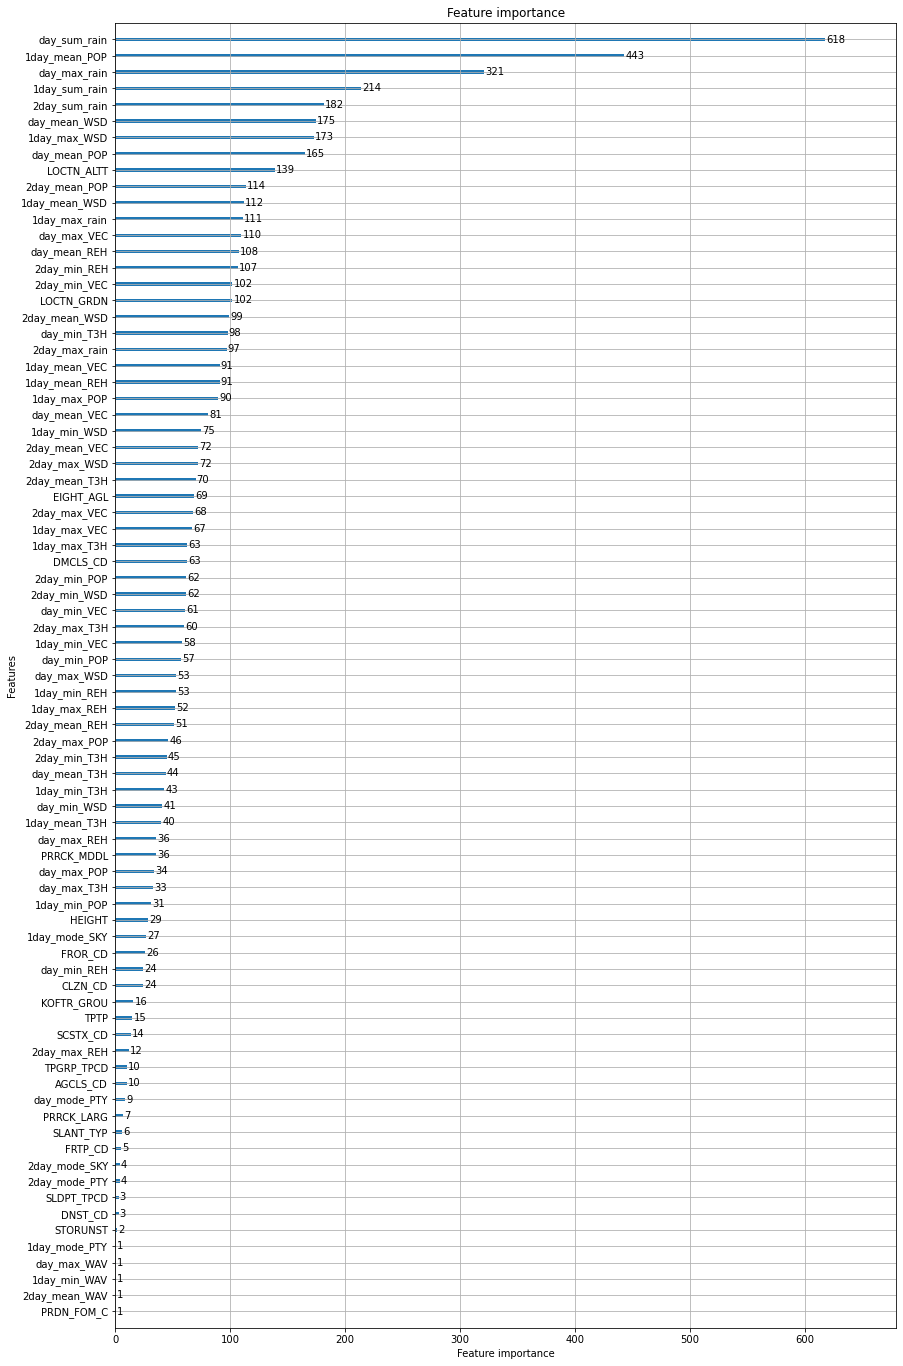

In [55]:
# LIGHTGBM  학습
                       
lgbm4 = LGBMClassifier(n_estimators=300, learning_rate=0.01, num_leaves=45, sumbsample=0.8, colsample_bytree=0.5, max_depth=10,
                             min_child_weight=5)
evals = [(X_test4, y_test4)]
lgbm4.fit(X_train4, y_train4, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm4, ax=ax)

In [56]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test5, y_test5)]
    model.fit(X_resampled5, y_resampled5, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.06891  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.06424  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.06835  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.06129  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.06374  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06085  |  0.7807   |  0.1189   |  6.352    |  7.245    |  26.89    |  0.9289   |
|  7        | -0.06391  |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        | -0.06213  |  0.7848   |  0.06465  |  6.514    |  7.435    |  26.93    |  0.9284   |
|  9        | -0.064

[1]	valid_0's binary_logloss: 0.179015
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176915
[3]	valid_0's binary_logloss: 0.175701
[4]	valid_0's binary_logloss: 0.173243
[5]	valid_0's binary_logloss: 0.171649
[6]	valid_0's binary_logloss: 0.168447
[7]	valid_0's binary_logloss: 0.165479
[8]	valid_0's binary_logloss: 0.162681
[9]	valid_0's binary_logloss: 0.161099
[10]	valid_0's binary_logloss: 0.158579
[11]	valid_0's binary_logloss: 0.156112
[12]	valid_0's binary_logloss: 0.153762
[13]	valid_0's binary_logloss: 0.152313
[14]	valid_0's binary_logloss: 0.150143
[15]	valid_0's binary_logloss: 0.148789
[16]	valid_0's binary_logloss: 0.147529
[17]	valid_0's binary_logloss: 0.145637
[18]	valid_0's binary_logloss: 0.143825
[19]	valid_0's binary_logloss: 0.141928
[20]	valid_0's binary_logloss: 0.140773
[21]	valid_0's binary_logloss: 0.139254
[22]	valid_0's binary_logloss: 0.137773
[23]	valid_0's binary_logloss: 0.136621
[24]	valid_0's binary_loglo

[264]	valid_0's binary_logloss: 0.0615735
[265]	valid_0's binary_logloss: 0.0615281
[266]	valid_0's binary_logloss: 0.061462
[267]	valid_0's binary_logloss: 0.0613939
[268]	valid_0's binary_logloss: 0.0613024
[269]	valid_0's binary_logloss: 0.0612156
[270]	valid_0's binary_logloss: 0.0611802
[271]	valid_0's binary_logloss: 0.0611253
[272]	valid_0's binary_logloss: 0.0610735
[273]	valid_0's binary_logloss: 0.061046
[274]	valid_0's binary_logloss: 0.0609658
[275]	valid_0's binary_logloss: 0.0609364
[276]	valid_0's binary_logloss: 0.0609356
[277]	valid_0's binary_logloss: 0.0609047
[278]	valid_0's binary_logloss: 0.0608776
[279]	valid_0's binary_logloss: 0.0607865
[280]	valid_0's binary_logloss: 0.060733
[281]	valid_0's binary_logloss: 0.0607073
[282]	valid_0's binary_logloss: 0.0606951
[283]	valid_0's binary_logloss: 0.0606139
[284]	valid_0's binary_logloss: 0.0605786
[285]	valid_0's binary_logloss: 0.0605114
[286]	valid_0's binary_logloss: 0.0604532
[287]	valid_0's binary_logloss: 0.060

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

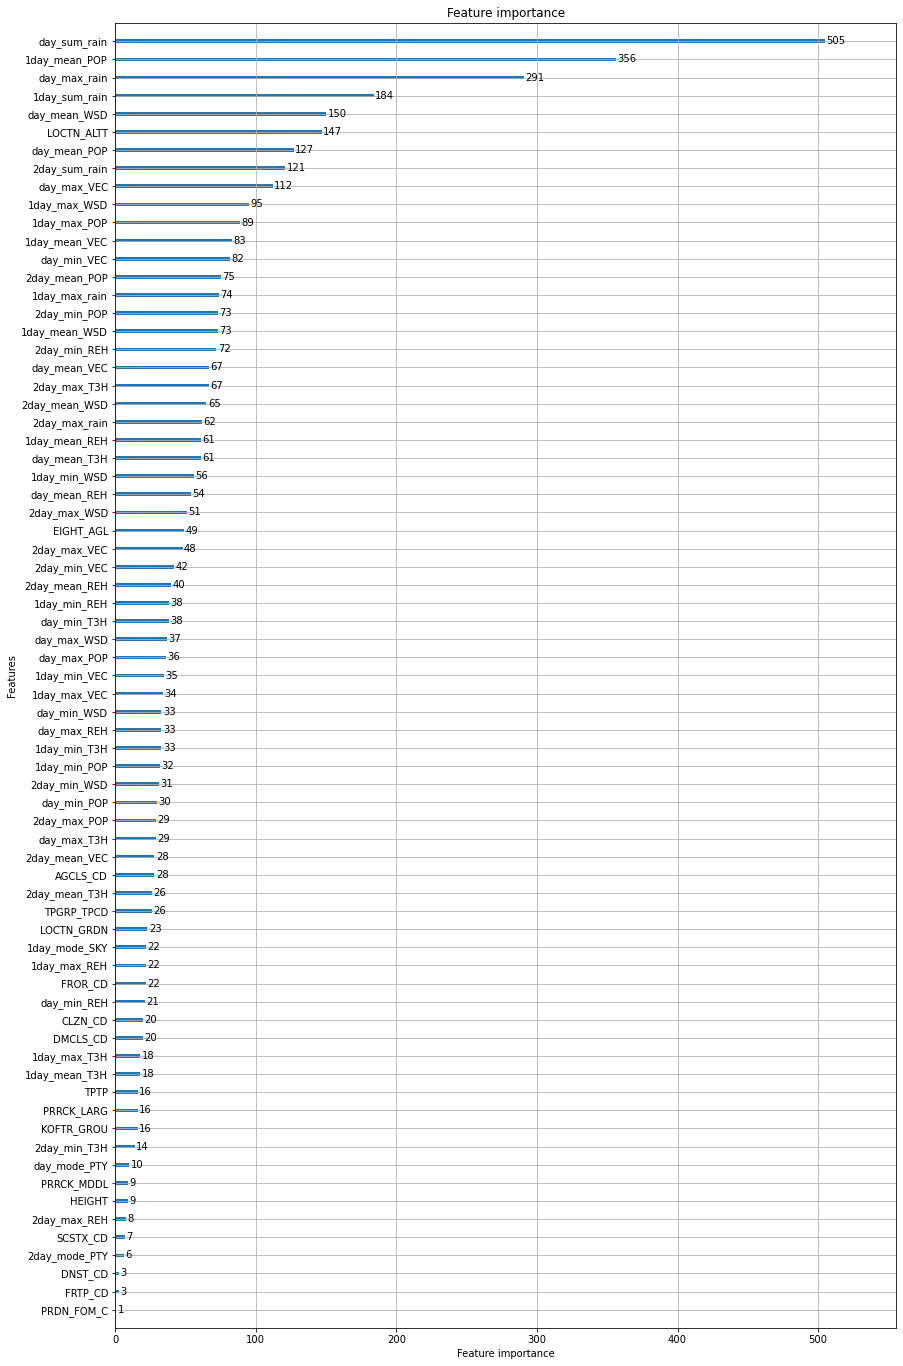

In [57]:
# LIGHTGBM  학습
                       
lgbm5 = LGBMClassifier(n_estimators=300, learning_rate=0.01, num_leaves=30, sumbsample=0.8, colsample_bytree=0.5, max_depth=10,
                             min_child_weight=6.158 )
evals = [(X_test5, y_test5)]
lgbm5.fit(X_train5, y_train5, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm5, ax=ax)

In [58]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test6, y_test6)]
    model.fit(X_resampled6, y_resampled6, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.07062  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.06502  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.07238  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.06697  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.06979  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06785  |  0.5796   |  0.07331  |  6.565    |  7.225    |  32.53    |  0.9459   |
|  7        | -0.06632  |  0.6329   |  0.09501  |  5.636    |  6.704    |  33.35    |  0.9357   |
|  8        | -0.06709  |  0.5823   |  0.1436   |  5.591    |  7.887    |  33.31    |  0.9044   |
|  9        | -0.066

[1]	valid_0's binary_logloss: 0.169855
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.158868
[3]	valid_0's binary_logloss: 0.149026
[4]	valid_0's binary_logloss: 0.13644
[5]	valid_0's binary_logloss: 0.132146
[6]	valid_0's binary_logloss: 0.122553
[7]	valid_0's binary_logloss: 0.114963
[8]	valid_0's binary_logloss: 0.108339
[9]	valid_0's binary_logloss: 0.105232
[10]	valid_0's binary_logloss: 0.10048
[11]	valid_0's binary_logloss: 0.0962759
[12]	valid_0's binary_logloss: 0.0924982
[13]	valid_0's binary_logloss: 0.0905896
[14]	valid_0's binary_logloss: 0.0875705
[15]	valid_0's binary_logloss: 0.0848525
[16]	valid_0's binary_logloss: 0.0834863
[17]	valid_0's binary_logloss: 0.0813518
[18]	valid_0's binary_logloss: 0.0792479
[19]	valid_0's binary_logloss: 0.0772021
[20]	valid_0's binary_logloss: 0.0764067
[21]	valid_0's binary_logloss: 0.07443
[22]	valid_0's binary_logloss: 0.072736
[23]	valid_0's binary_logloss: 0.0714195
[24]	valid_0's bina

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

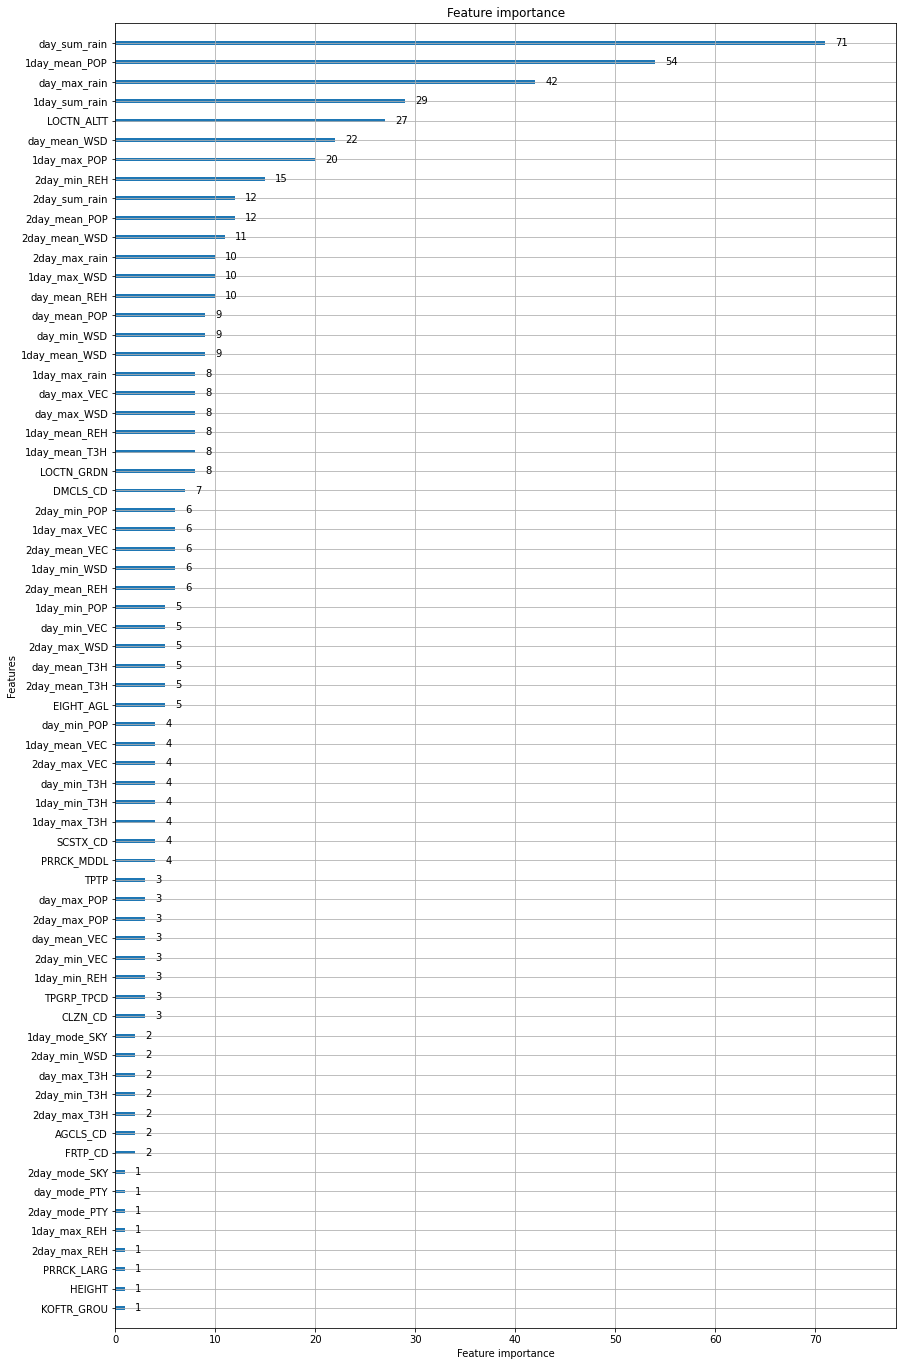

In [59]:
# LIGHTGBM  학습
                       
lgbm6 = LGBMClassifier(n_estimators=300, learning_rate=0.06745, num_leaves=31, sumbsample=0.9385, colsample_bytree=0.5702, max_depth=9,
                             min_child_weight=8.873)
evals = [(X_test6, y_test6)]
lgbm6.fit(X_train6, y_train6, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm6, ax=ax)

In [60]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test7, y_test7)]
    model.fit(X_resampled7, y_resampled7, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.06775  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.06617  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.06866  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.06065  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.0697   |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06488  |  0.5      |  0.01     |  10.0     |  9.0      |  32.23    |  0.8166   |
|  7        | -0.06236  |  0.5752   |  0.03715  |  8.937    |  9.0      |  28.95    |  0.9508   |
|  8        | -0.06131  |  1.0      |  0.3      |  8.711    |  6.962    |  30.21    |  1.0      |
|  9        | -0.064

[1]	valid_0's binary_logloss: 0.135959
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.111756
[3]	valid_0's binary_logloss: 0.0988343
[4]	valid_0's binary_logloss: 0.090337
[5]	valid_0's binary_logloss: 0.0834316
[6]	valid_0's binary_logloss: 0.0781168
[7]	valid_0's binary_logloss: 0.0744368
[8]	valid_0's binary_logloss: 0.0715501
[9]	valid_0's binary_logloss: 0.0674675
[10]	valid_0's binary_logloss: 0.0653837
[11]	valid_0's binary_logloss: 0.0638944
[12]	valid_0's binary_logloss: 0.0626886
[13]	valid_0's binary_logloss: 0.0612149
[14]	valid_0's binary_logloss: 0.0608716
[15]	valid_0's binary_logloss: 0.0597006
[16]	valid_0's binary_logloss: 0.0597252
[17]	valid_0's binary_logloss: 0.058826
[18]	valid_0's binary_logloss: 0.0590213
[19]	valid_0's binary_logloss: 0.0582372
[20]	valid_0's binary_logloss: 0.0574337
[21]	valid_0's binary_logloss: 0.0566817
[22]	valid_0's binary_logloss: 0.0563894
[23]	valid_0's binary_logloss: 0.056351
[24]	vali

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

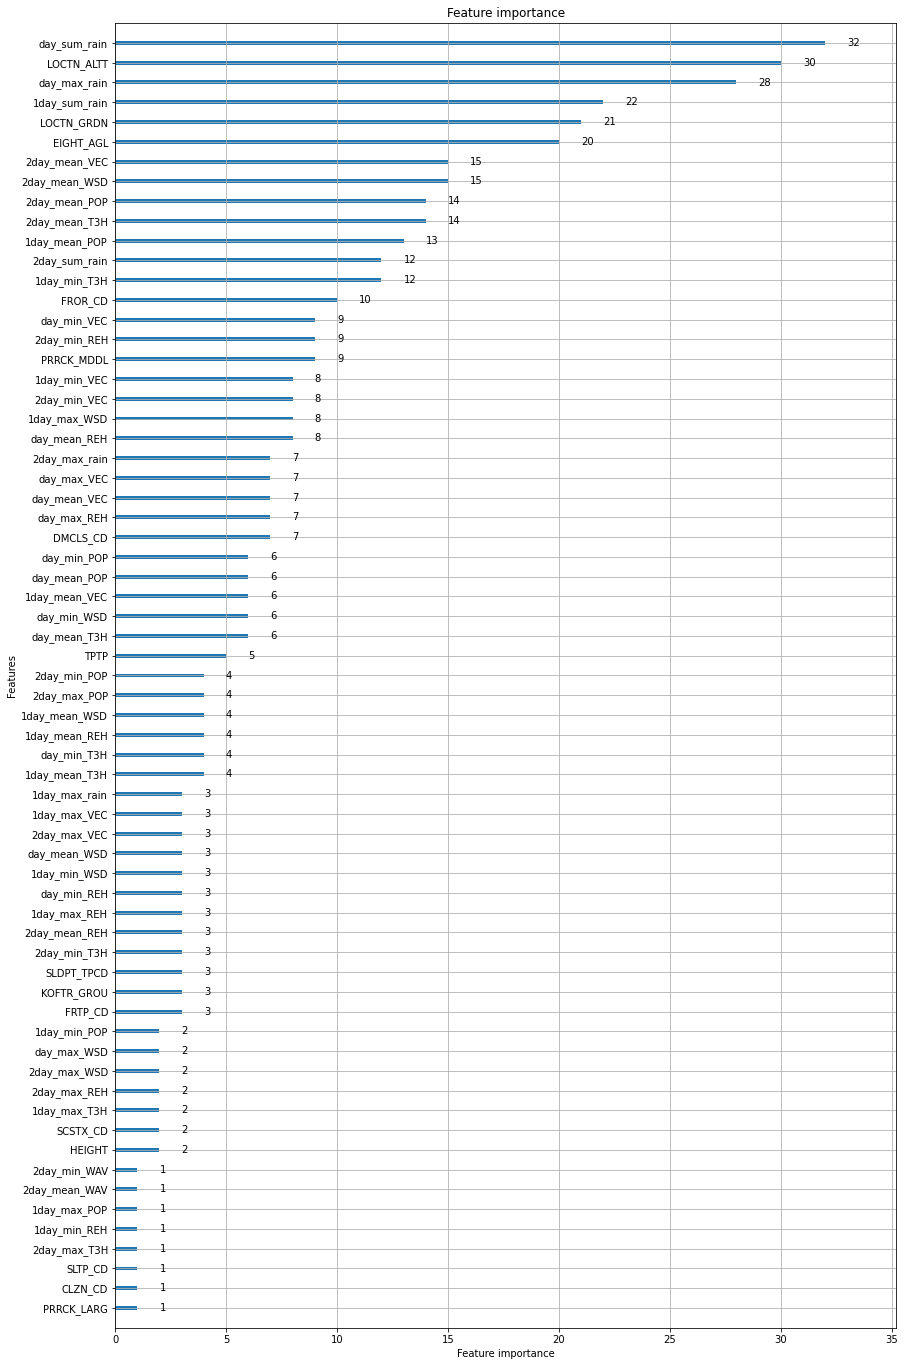

In [61]:
# LIGHTGBM  학습
                       
lgbm7 = LGBMClassifier(n_estimators=300, learning_rate=0.23, num_leaves=33, sumbsample=0.8861, colsample_bytree=0.9906, max_depth=6,
                             min_child_weight=7.346)
evals = [(X_test7, y_test7)]
lgbm7.fit(X_train7, y_train7, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm7, ax=ax)

In [62]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test8, y_test8)]
    model.fit(X_resampled8, y_resampled8, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.07018  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.06728  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.06886  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.06704  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.06935  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.06876  |  0.8264   |  0.04004  |  9.07     |  6.978    |  33.05    |  0.952    |
|  7        | -0.06684  |  0.5      |  0.08336  |  6.859    |  8.388    |  31.24    |  0.9398   |
|  8        | -0.06947  |  1.0      |  0.01     |  7.369    |  9.0      |  28.55    |  1.0      |
|  9        | -0.068

[1]	valid_0's binary_logloss: 0.191004
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.188106
[3]	valid_0's binary_logloss: 0.186321
[4]	valid_0's binary_logloss: 0.182303
[5]	valid_0's binary_logloss: 0.180231
[6]	valid_0's binary_logloss: 0.176375
[7]	valid_0's binary_logloss: 0.172877
[8]	valid_0's binary_logloss: 0.169602
[9]	valid_0's binary_logloss: 0.168082
[10]	valid_0's binary_logloss: 0.165138
[11]	valid_0's binary_logloss: 0.162581
[12]	valid_0's binary_logloss: 0.160061
[13]	valid_0's binary_logloss: 0.158531
[14]	valid_0's binary_logloss: 0.156208
[15]	valid_0's binary_logloss: 0.154904
[16]	valid_0's binary_logloss: 0.153491
[17]	valid_0's binary_logloss: 0.151422
[18]	valid_0's binary_logloss: 0.149513
[19]	valid_0's binary_logloss: 0.147536
[20]	valid_0's binary_logloss: 0.146399
[21]	valid_0's binary_logloss: 0.144767
[22]	valid_0's binary_logloss: 0.143168
[23]	valid_0's binary_logloss: 0.141915
[24]	valid_0's binary_loglo

[227]	valid_0's binary_logloss: 0.0637212
[228]	valid_0's binary_logloss: 0.063631
[229]	valid_0's binary_logloss: 0.0635952
[230]	valid_0's binary_logloss: 0.0634807
[231]	valid_0's binary_logloss: 0.0633825
[232]	valid_0's binary_logloss: 0.0632944
[233]	valid_0's binary_logloss: 0.0631604
[234]	valid_0's binary_logloss: 0.0631017
[235]	valid_0's binary_logloss: 0.0630529
[236]	valid_0's binary_logloss: 0.0629463
[237]	valid_0's binary_logloss: 0.0628649
[238]	valid_0's binary_logloss: 0.062814
[239]	valid_0's binary_logloss: 0.0627161
[240]	valid_0's binary_logloss: 0.0626337
[241]	valid_0's binary_logloss: 0.0625472
[242]	valid_0's binary_logloss: 0.0624603
[243]	valid_0's binary_logloss: 0.0623474
[244]	valid_0's binary_logloss: 0.0622735
[245]	valid_0's binary_logloss: 0.0621853
[246]	valid_0's binary_logloss: 0.0621154
[247]	valid_0's binary_logloss: 0.0620113
[248]	valid_0's binary_logloss: 0.0619326
[249]	valid_0's binary_logloss: 0.061835
[250]	valid_0's binary_logloss: 0.061

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

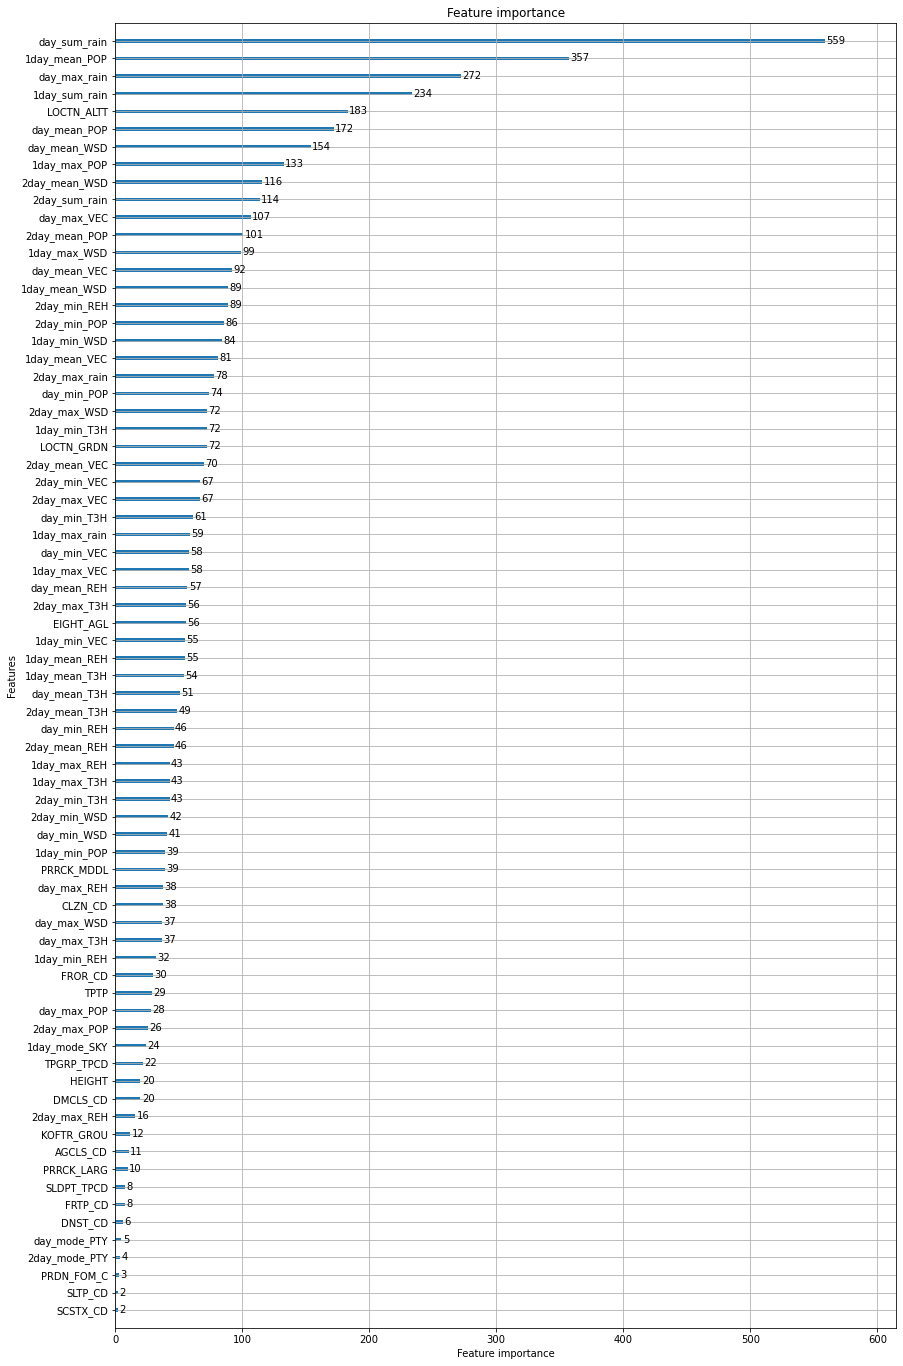

In [63]:
# LIGHTGBM  학습
                       
lgbm8 = LGBMClassifier(n_estimators=300, learning_rate=0.01, num_leaves=31, sumbsample=0.8, colsample_bytree= 0.5, max_depth=10,
                             min_child_weight=5)
evals = [(X_test8, y_test8)]
lgbm8.fit(X_train8, y_train8, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm8, ax=ax)

In [64]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test9, y_test9)]
    model.fit(X_resampled9, y_resampled9, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.07771  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        |  0.07848  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        |  0.07975  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        |  0.07817  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        |  0.08044  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        |  0.07559  |  0.7807   |  0.1189   |  6.352    |  7.245    |  26.89    |  0.9289   |
|  7        |  0.08015  |  0.7989   |  0.1023   |  7.641    |  6.794    |  27.62    |  0.8606   |
|  8        |  0.08005  |  0.8546   |  0.1477   |  7.56     |  6.998    |  27.76    |  0.8888   |
|  9        |  0.078

[1]	valid_0's binary_logloss: 0.153371
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.1323
[3]	valid_0's binary_logloss: 0.122489
[4]	valid_0's binary_logloss: 0.114857
[5]	valid_0's binary_logloss: 0.109455
[6]	valid_0's binary_logloss: 0.105542
[7]	valid_0's binary_logloss: 0.100249
[8]	valid_0's binary_logloss: 0.0954124
[9]	valid_0's binary_logloss: 0.0929924
[10]	valid_0's binary_logloss: 0.0892061
[11]	valid_0's binary_logloss: 0.0886458
[12]	valid_0's binary_logloss: 0.0874073
[13]	valid_0's binary_logloss: 0.0869408
[14]	valid_0's binary_logloss: 0.0863705
[15]	valid_0's binary_logloss: 0.084815
[16]	valid_0's binary_logloss: 0.083747
[17]	valid_0's binary_logloss: 0.0838265
[18]	valid_0's binary_logloss: 0.0825639
[19]	valid_0's binary_logloss: 0.0817784
[20]	valid_0's binary_logloss: 0.0821356
[21]	valid_0's binary_logloss: 0.0825888
[22]	valid_0's binary_logloss: 0.0818163
[23]	valid_0's binary_logloss: 0.081414
[24]	valid_0's b

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

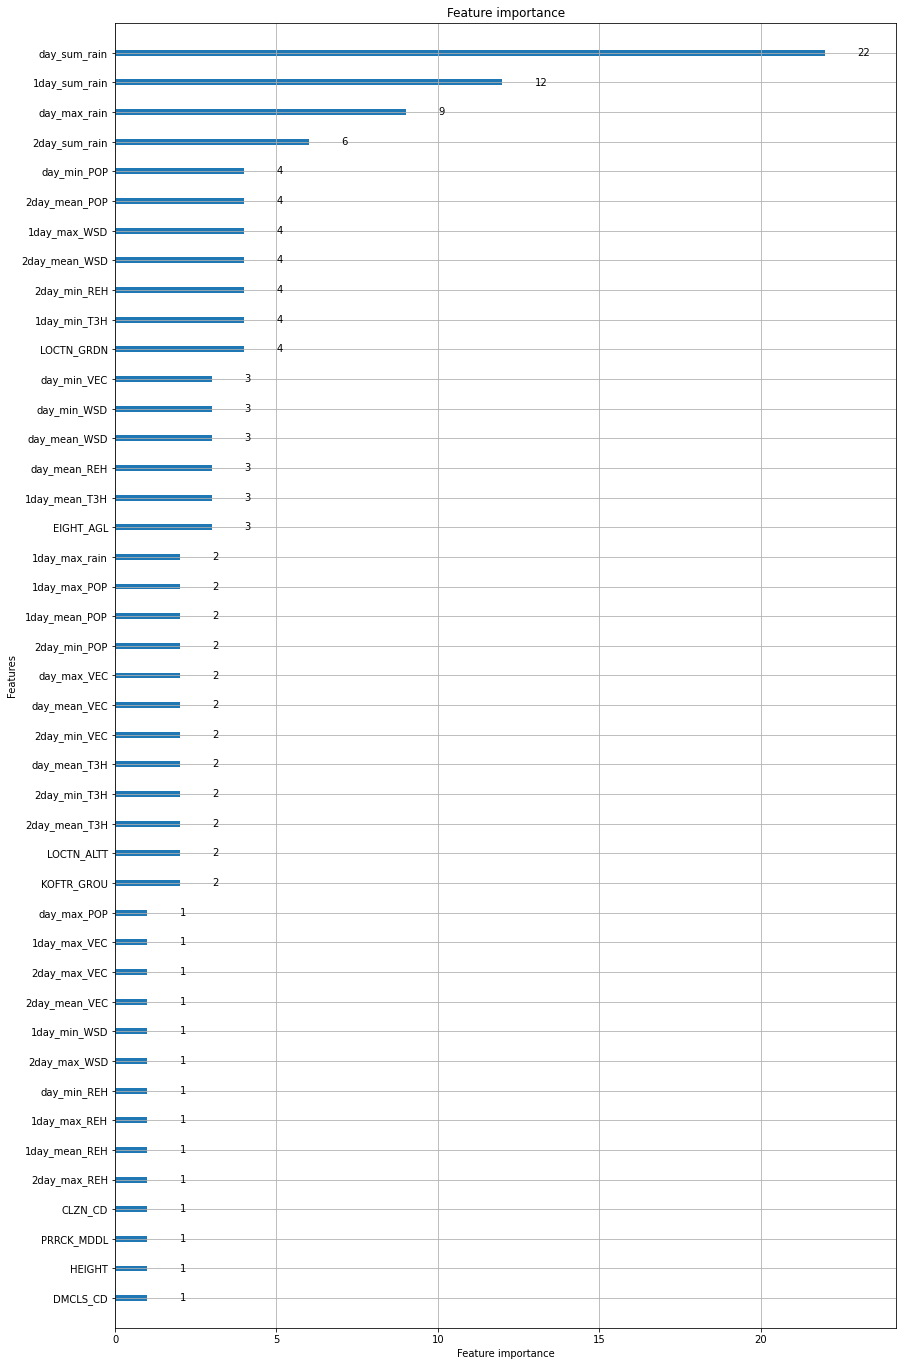

In [65]:
# LIGHTGBM  학습
                       
lgbm9 = LGBMClassifier(n_estimators=300, learning_rate=0.3, num_leaves=30, sumbsample=1.0, colsample_bytree=1.0, max_depth=3,
                             min_child_weight=8.592)
evals = [(X_test9, y_test9)]
lgbm9.fit(X_train9, y_train9, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm9, ax=ax)

In [66]:
# LIGHTGBM 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):

    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=1000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test10, y_test10)]
    model.fit(X_resampled10, y_resampled10, eval_metric="binary_logloss", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['binary_logloss']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.06479  |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -0.05959  |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -0.06467  |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -0.05817  |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -0.06433  |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -0.05757  |  0.5947   |  0.01     |  9.296    |  7.022    |  33.13    |  0.986    |
|  7        | -0.05823  |  1.0      |  0.01     |  9.568    |  9.0      |  37.67    |  0.8      |
|  8        | -0.06131  |  0.5      |  0.3      |  10.0     |  5.0      |  42.25    |  1.0      |
|  9        | -0.058

[1]	valid_0's binary_logloss: 0.179211
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.166602
[3]	valid_0's binary_logloss: 0.15405
[4]	valid_0's binary_logloss: 0.141365
[5]	valid_0's binary_logloss: 0.135804
[6]	valid_0's binary_logloss: 0.126632
[7]	valid_0's binary_logloss: 0.119287
[8]	valid_0's binary_logloss: 0.111854
[9]	valid_0's binary_logloss: 0.108975
[10]	valid_0's binary_logloss: 0.103466
[11]	valid_0's binary_logloss: 0.0989684
[12]	valid_0's binary_logloss: 0.0952238
[13]	valid_0's binary_logloss: 0.0930917
[14]	valid_0's binary_logloss: 0.0897413
[15]	valid_0's binary_logloss: 0.0872298
[16]	valid_0's binary_logloss: 0.0859118
[17]	valid_0's binary_logloss: 0.0835864
[18]	valid_0's binary_logloss: 0.0814926
[19]	valid_0's binary_logloss: 0.0793561
[20]	valid_0's binary_logloss: 0.0783643
[21]	valid_0's binary_logloss: 0.0767864
[22]	valid_0's binary_logloss: 0.0752118
[23]	valid_0's binary_logloss: 0.0737336
[24]	valid_0's 

[270]	valid_0's binary_logloss: 0.05581
[271]	valid_0's binary_logloss: 0.0559463
[272]	valid_0's binary_logloss: 0.0559803
[273]	valid_0's binary_logloss: 0.056003
[274]	valid_0's binary_logloss: 0.0559602
[275]	valid_0's binary_logloss: 0.0559725
[276]	valid_0's binary_logloss: 0.0559272
[277]	valid_0's binary_logloss: 0.0560498
[278]	valid_0's binary_logloss: 0.0560285
[279]	valid_0's binary_logloss: 0.0560711
[280]	valid_0's binary_logloss: 0.0560792
[281]	valid_0's binary_logloss: 0.056143
[282]	valid_0's binary_logloss: 0.0561031
[283]	valid_0's binary_logloss: 0.0561158
[284]	valid_0's binary_logloss: 0.0560821
[285]	valid_0's binary_logloss: 0.0560789
[286]	valid_0's binary_logloss: 0.0561847
[287]	valid_0's binary_logloss: 0.0562265
[288]	valid_0's binary_logloss: 0.0562061
[289]	valid_0's binary_logloss: 0.0562366
[290]	valid_0's binary_logloss: 0.0561523
[291]	valid_0's binary_logloss: 0.0561587
Early stopping, best iteration is:
[191]	valid_0's binary_logloss: 0.0548263


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

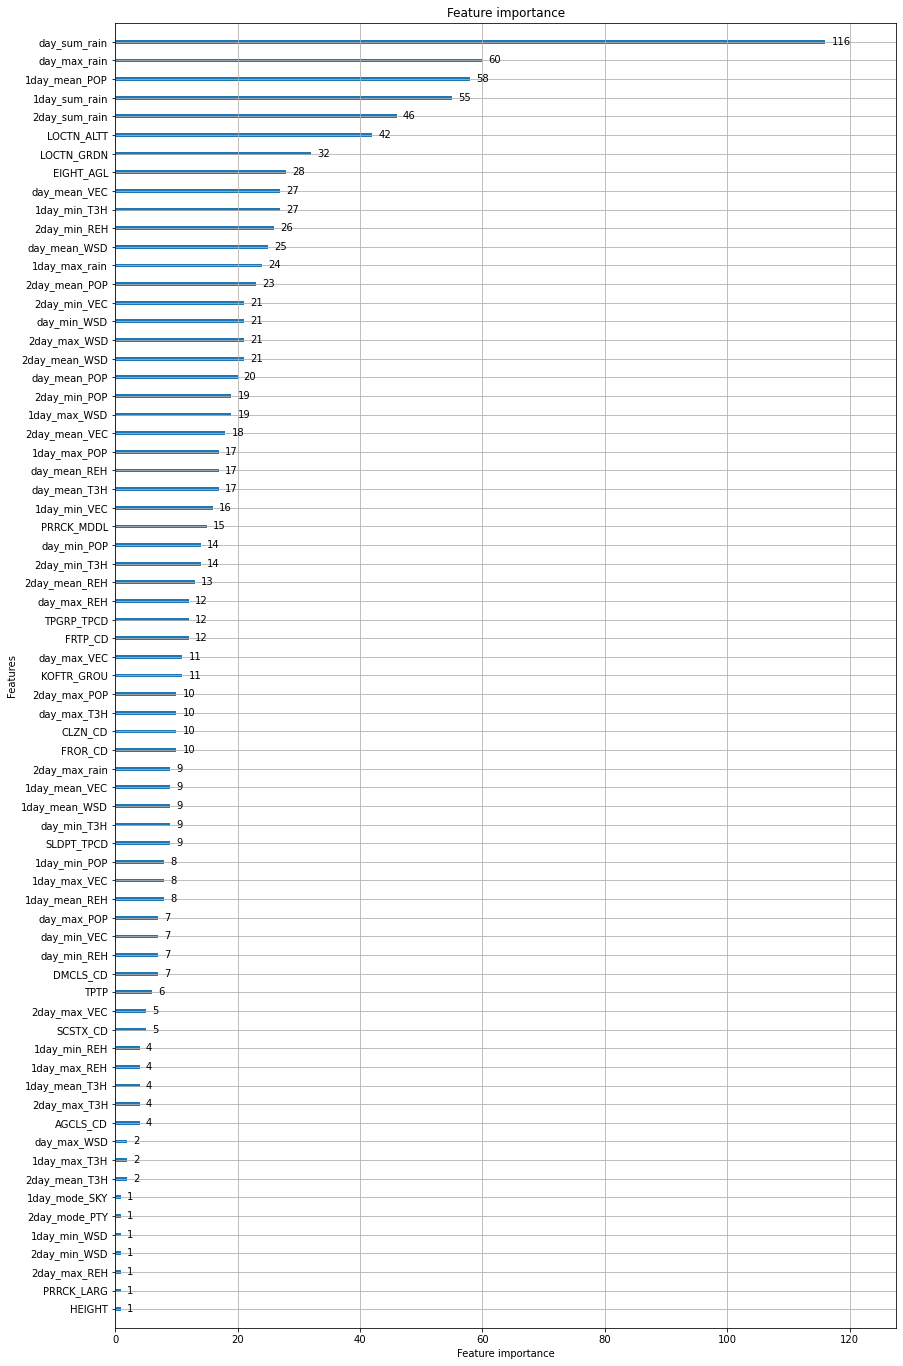

In [67]:
# LIGHTGBM  학습
                       
lgbm10 = LGBMClassifier(n_estimators=300, learning_rate=0.06745, num_leaves=31, sumbsample=0.9385, colsample_bytree=0.5702, max_depth=9,
                             min_child_weight=8.873)
evals = [(X_test10, y_test10)]
lgbm10.fit(X_train10, y_train10, early_stopping_rounds=100, eval_metric='binary_logloss', eval_set=evals, verbose=True)

from lightgbm import plot_importance #  변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm10, ax=ax)

In [68]:
predictions1 = lgbm1.predict_proba(test_1)[:,1]

In [69]:
predictions2 = lgbm1.predict_proba(test_1)[:,1]

In [70]:
predictions3 = lgbm1.predict_proba(test_1)[:,1]

In [71]:
predictions4 = lgbm1.predict_proba(test_1)[:,1]

In [72]:
predictions5 = lgbm1.predict_proba(test_1)[:,1]

In [73]:
predictions6 = lgbm1.predict_proba(test_1)[:,1]

In [74]:
predictions7 = lgbm1.predict_proba(test_1)[:,1]

In [75]:
predictions8 = lgbm1.predict_proba(test_1)[:,1]

In [76]:
predictions9 = lgbm1.predict_proba(test_1)[:,1]

In [77]:
predictions10 = lgbm1.predict_proba(test_1)[:,1]

In [78]:
preds1 = [ 1 if x > 0.5 else 0 for x in predictions1 ]

In [79]:
preds2 = [ 1 if x > 0.5 else 0 for x in predictions2 ]

In [80]:
preds3 = [ 1 if x > 0.5 else 0 for x in predictions3 ]

In [81]:
preds4 = [ 1 if x > 0.5 else 0 for x in predictions4 ]

In [82]:
preds5 = [ 1 if x > 0.5 else 0 for x in predictions5 ]

In [83]:
preds6 = [ 1 if x > 0.5 else 0 for x in predictions6 ]

In [84]:
preds7 = [ 1 if x > 0.5 else 0 for x in predictions7 ]

In [85]:
preds8 = [ 1 if x > 0.5 else 0 for x in predictions8 ]

In [86]:
preds9 = [ 1 if x > 0.5 else 0 for x in predictions9 ]

In [87]:
preds10 = [ 1 if x > 0.5 else 0 for x in predictions10 ]

In [88]:
lgbm_pred1=pd.DataFrame(preds1, columns= ['col1']) # tab-> lgbm
lgbm_pred2=pd.DataFrame(preds2, columns= ['col2'])
lgbm_pred3=pd.DataFrame(preds3, columns= ['col3'])
lgbm_pred4=pd.DataFrame(preds4, columns= ['col4'])
lgbm_pred5=pd.DataFrame(preds5, columns= ['col5'])

In [89]:
lgbm_pred6=pd.DataFrame(preds6, columns= ['col6'])
lgbm_pred7=pd.DataFrame(preds7, columns= ['col7'])
lgbm_pred8=pd.DataFrame(preds8, columns= ['col8'])
lgbm_pred9=pd.DataFrame(preds9, columns= ['col9'])
lgbm_pred10=pd.DataFrame(preds10, columns= ['col10'])

In [90]:
lgbm_pred1['col1'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col1, dtype: int64

In [91]:
lgbm_pred2['col2'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col2, dtype: int64

In [92]:
lgbm_pred3['col3'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col3, dtype: int64

In [93]:
lgbm_pred4['col4'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col4, dtype: int64

In [94]:
lgbm_pred5['col5'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col5, dtype: int64

In [95]:
lgbm_pred6['col6'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col6, dtype: int64

In [96]:
lgbm_pred7['col7'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col7, dtype: int64

In [97]:
lgbm_pred8['col8'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col8, dtype: int64

In [98]:
lgbm_pred9['col9'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col9, dtype: int64

In [99]:
lgbm_pred10['col10'].value_counts()# tab-> lgbm

0    3354
1      56
Name: col10, dtype: int64

In [100]:
lgbm_pred=lgbm_pred1.join(lgbm_pred2, how= 'inner')  # tab-> lgbm
lgbm_pred=lgbm_pred.join(lgbm_pred3, how= 'inner') 
lgbm_pred=lgbm_pred.join(lgbm_pred4, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred5, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred6, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred7, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred8, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred9, how= 'inner')
lgbm_pred=lgbm_pred.join(lgbm_pred10, how= 'inner')
lgbm_pred['sum']=lgbm_pred['col1']+lgbm_pred['col2']+lgbm_pred['col3']+lgbm_pred['col4']+lgbm_pred['col5']+lgbm_pred['col6']+lgbm_pred['col7']+lgbm_pred['col8']+lgbm_pred['col9']+lgbm_pred['col10']

In [101]:
lgbm_pred['1day_yn'] = np.where((lgbm_pred['sum']>=5), 1,0)

In [102]:
lgbm_pred['1day_yn'].value_counts()

0    3354
1      56
Name: 1day_yn, dtype: int64

In [103]:
sub_1=test_id_1.join(lgbm_pred, how= 'inner')

In [104]:
sub_1.to_csv('lgbm_sub2.csv', index=False, encoding='CP949')